In [1]:
import numpy as np
import treeQuadrature as tq
import matplotlib.pyplot as plt
from matplotlib import cm
from functools import partial

In [21]:
# Add src to path
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,os.path.join(parentdir, 'results'))
from problems import *

In [75]:
base_N = 20_000
split = tq.splits.minSseSplit
# integral = tq.containerIntegration.midpointIntegral
integral = partial(tq.containerIntegration.randomIntegral, n=100)
# weighting_function = lambda container: np.max(container.y) - np.min(container.y) + 1
weighting_function = lambda container: np.var(container.y) + 1
# weighting_function = lambda container: container.volume
active_N = 10
num_splits = 4_500
stopping_condition = lambda container: container.N <= 40
queue = tq.queues.ReservoirQueue(accentuation_factor=100)

In [76]:
integ = tq.integrators.ReservoirIntegrator(base_N, split, integral, weighting_function, queue=queue,
                                          active_N=active_N, num_splits=num_splits, stopping_condition=stopping_condition)

In [77]:
problem = Camel(10)

In [78]:
G, fcs, cs, N, ss = integ(problem, return_all=True)

pcntError: -85.26901468151249
Samples:  560100
Container:  4501
Splits:  4500


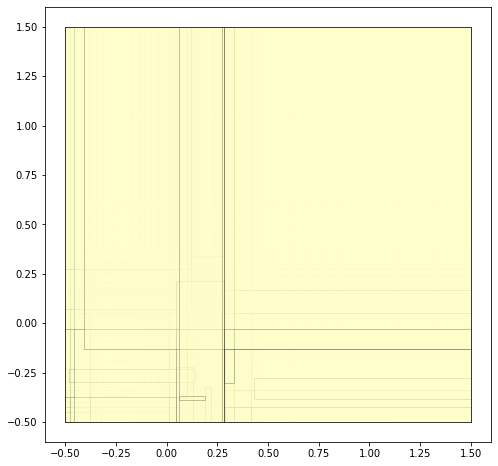

In [79]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.set_xlim([-0.6,1.6])
ax.set_ylim([-0.6,1.6])
cmap = cm.get_cmap('YlOrRd', 256)

cs = tq.utils.scale(cs)

print(f'pcntError: {100 * (G - problem.answer) / problem.answer}')
print("Samples: ", N)
print("Container: ", len(fcs))
print("Splits: ", ss)

for container, contribution in zip(fcs, cs):
    tq.visualisation.plotContainer(ax, container, plot_samples=False, fill=True, ec='black', facecolor=cmap(contribution), alpha=0.4)

In [80]:
ps = [c / sum(cs) for c in cs]
conts = np.random.choice(fcs, p=ps, size=(10_000))

In [81]:
samples = np.array([cont.rvs(1)[0] for cont in conts])

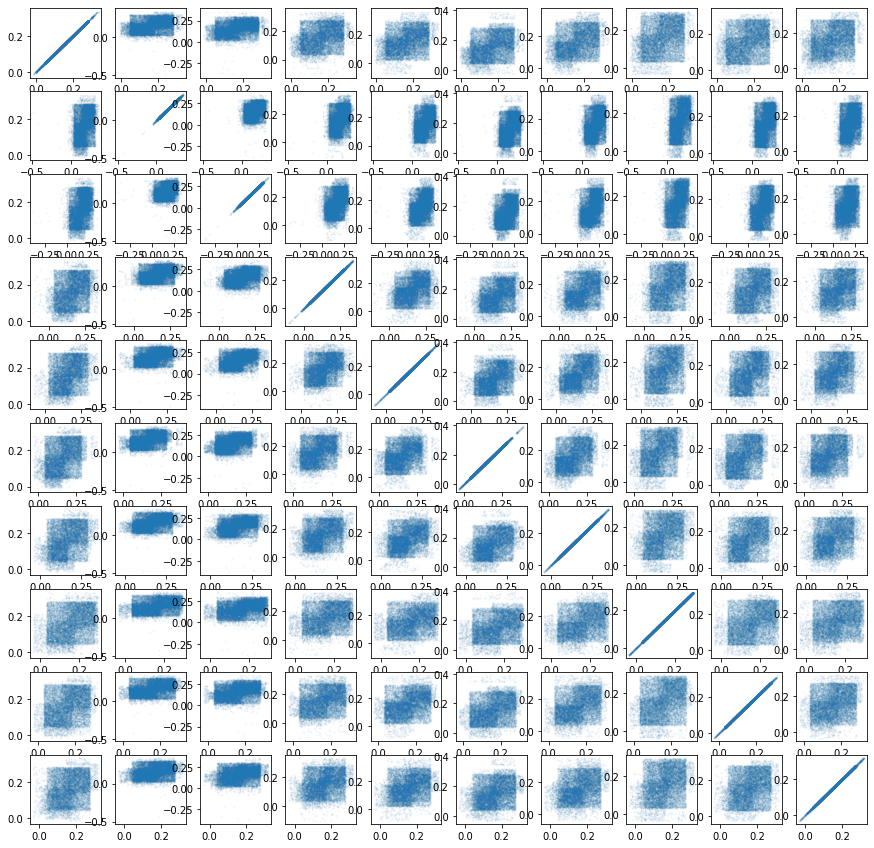

In [82]:
fig = plt.figure(figsize=(15,15))
for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10, 10, i*10 + (j+1))
        ax.scatter(samples[:, i], samples[:, j], s=1, alpha=0.05)

In [2]:
class Chain:
    def __init__(self, j):
        self.lower = 1
        self.upper = (2*j) + 1
        self.x = j
        
    def update(self):
        if self.x == self.lower:
            step = np.random.choice([0, 1], p=[0.5, 0.5])
            self.x += step
        elif self.x == self.upper:
            step = np.random.choice([-1, 0], p=[0.5, 0.5])
            self.x += step
        else:
            step = np.random.choice([-1, 0, 1], p=[0.25, 0.5, 0.25])
            self.x += step
        return self.x

In [3]:
X = Chain(10.0)

In [4]:
from tqdm import tqdm

In [5]:
# vals = [X.update() for i in tqdm(range(100_000_000))]

100%|██████████| 100000000/100000000 [42:50<00:00, 38907.85it/s]


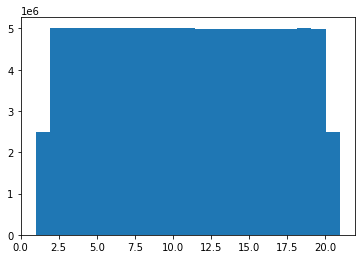

In [6]:
h = plt.hist(vals, bins=21)

In [9]:
vs = np.array(vals)

In [10]:
for i in range(1, (2*10) + 2):
    idxs = np.array(list(range(len(vals))))[vs == i]
    Hs = np.diff(idxs, n=1)
    print(i, Hs.mean())

1 40.05502513468586
2 20.000807437626595
3 19.99495604383959
4 19.973178093075845
5 19.942187532406205
6 19.932060466173148
7 19.941770924089322
8 19.9324357078219
9 19.948081061925507
10 19.9705220799321
11 20.004477606565956
12 20.055101462901224
13 20.06463751377941
14 20.061896048342813
15 20.043712589613055
16 20.031506723911676
17 20.04199554340371
18 20.024164475827614
19 19.994093068117564
20 20.01805351535585
21 40.041875938243415


In [11]:
Hs = []
for i in range(2, (2*10) + 1):
    idxs = np.array(list(range(len(vals))))[vs == i]
    Hss = np.diff(idxs, n=1)
    Hs.append(Hss.mean())
print(np.mean(Hs))

19.998717783932054


In [12]:
def f(x, y):

    cs = []
    state = 'looking for x'
    count = 1

    for i in vals:
        if state == 'looking for x':
            if i == x:
                state = 'looking for y'
                c = 0

        elif state == 'looking for y':

            c += 1

            if i == y:
                cs.append(c)
                state = 'looking for x'

        else:
            raise Exception()
            
    return np.mean(cs)

In [13]:
Hs = []
for i in range(1, 21):
    Hs.append(f(i, i+1))

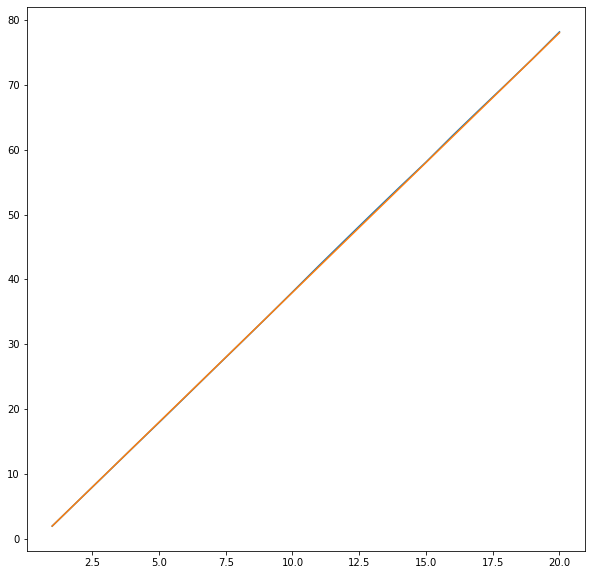

In [14]:
plt.figure(figsize=(10,10))
plt.plot(list(range(1,21)), Hs)
plt.plot(list(range(1,21)), -2 + 4*np.array(list(range(1,21))))

In [15]:
for i in range(1,11):
    print(i, f(i, 11))

1 199.71880609875774
2 197.7912003448028
3 191.82374583221554
4 181.6012852409269
5 167.63291332861704
6 149.72550019724966
7 127.74063981080418
8 101.89883747086498
9 72.04440900643796


In [16]:
print(10, f(10,11))

10 38.06032046144913
